## [作業重點]
確保你了解隨機森林模型中每個超參數的意義，並觀察調整超參數對結果的影響

## 作業

1. 試著調整 RandomForestClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型與決策樹的結果進行比較

In [1]:
from sklearn import datasets, metrics, linear_model
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

## Iris dataset
#### 調整 RandomForestClassifier(...) 中的參數

In [2]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

Acuuracy of n_estimators=1: train=0.9375 test=0.9210526315789473 
Acuuracy of n_estimators=2: train=0.9464285714285714 test=0.9473684210526315 
Acuuracy of n_estimators=4: train=0.9464285714285714 test=0.9736842105263158 
Acuuracy of n_estimators=6: train=0.9732142857142857 test=0.9736842105263158 
Acuuracy of n_estimators=8: train=0.9553571428571429 test=0.9736842105263158 
Acuuracy of n_estimators=10: train=0.9732142857142857 test=0.9736842105263158 
Acuuracy of n_estimators=15: train=0.9464285714285714 test=0.9736842105263158 
Acuuracy of n_estimators=20: train=0.9642857142857143 test=0.9736842105263158 


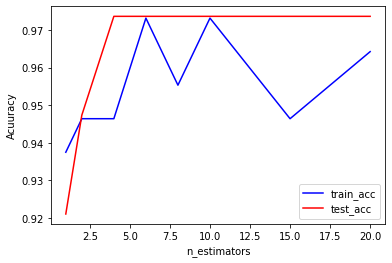

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

n_tree = [1,2,4,6,8,10,15,20]
acc_train_list = []
acc_test_list = []
for i in range(len(n_tree)):
    clf = RandomForestClassifier(n_estimators=n_tree[i], max_depth=2)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    acc_train = metrics.accuracy_score(y_train, clf.predict(x_train))
    acc_test = metrics.accuracy_score(y_test, y_pred)
    acc_train_list.append(acc_train)
    acc_test_list.append(acc_test)
    print("Acuuracy of n_estimators={}: train={} test={} ".format(n_tree[i], acc_train, acc_test))

plt.plot(n_tree, acc_train_list, 'b', label='train_acc')    
plt.plot(n_tree, acc_test_list, 'r', label='test_acc')
plt.xlabel('n_estimators')
plt.ylabel('Acuuracy')
plt.legend()   

## Boston dataset

In [4]:
# 讀取boston資料集
boston = datasets.load_boston()

In [5]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))

Mean squared error: 25.42


Mean squared error of n_estimators=2: train=9.556182283658162 test=28.190406526307157 
Mean squared error of n_estimators=4: train=8.900777749094704 test=21.950919308171525 
Mean squared error of n_estimators=8: train=7.731077837268201 test=19.11327954893701 
Mean squared error of n_estimators=16: train=7.801828824626387 test=19.35583548938947 
Mean squared error of n_estimators=32: train=7.086999791655708 test=19.386900206178215 
Mean squared error of n_estimators=64: train=7.037749041618378 test=21.202680360543926 
Mean squared error of n_estimators=128: train=7.014986114590331 test=19.915839572218346 
Mean squared error of n_estimators=256: train=7.116604964586292 test=20.60974771282967 


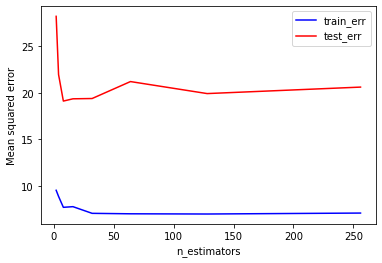

In [9]:
n_tree = [2,4,8,16,32,64,128,256]
train_err_list = []
test_err_list = []
for i in range(len(n_tree)):
    regr = RandomForestRegressor(n_estimators=n_tree[i], max_depth=4)
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    train_err = metrics.mean_squared_error(y_train, regr.predict(x_train))
    test_err = metrics.mean_squared_error(y_test, y_pred)
    print("Mean squared error of n_estimators={}: train={} test={} ".format(n_tree[i], train_err, test_err))
    train_err_list.append(train_err)
    test_err_list.append(test_err)
    
plt.plot(n_tree, train_err_list, 'b', label='train_err')    
plt.plot(n_tree, test_err_list, 'r', label='test_err')
plt.xlabel('n_estimators')
plt.ylabel('Mean squared error')
plt.legend()